In [1]:
import pandas as pd
import numpy as np

## Evaluating ML model

1. Estimator's builtin `score()` method
2. The `scoring` parameter
3. Problem-spcific metric functions

## 1. Evaluating ML model with `score` method

In [2]:
## classification problem

df = pd.read_csv('data/heart-disease.csv')

x=df.drop('target',axis=1)
y=df.target

np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

## The default score() evaluation metrics for classification is Accuracy

In [103]:
clf.score(x_train,y_train), clf.score(x_test, y_test)

(1.0, 0.8524590163934426)

In [104]:
## regression problem

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns = housing.feature_names)
df[housing.target_names[0]] = housing.target
df.rename(columns={'MedHouseVal':'target'},inplace=True); df.head()

x=df.drop('target',axis=1)
y=df.target

np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train,y_train)

In [105]:
y_pred = model.predict(x_test)

### The default score() evaluation metrics for Regression is R-Squared value

In [106]:
model.score(x_train, y_train), model.score(x_test,y_test)

(0.973672870076171, 0.8057655811971304)

## 2. Evaluate using `scoring` parameter

In [39]:
## Classification

df = pd.read_csv('data/heart-disease.csv')

x=df.drop('target',axis=1)
y=df.target

np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

In [42]:
clf.score(x_test, y_test)

0.8524590163934426

In [46]:
## cross_val_score

from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y, cv = 5)  #cv -> Cross validation

array([0.7704918 , 0.8852459 , 0.75409836, 0.85      , 0.78333333])

In [57]:
#comparing score and cross_val_score

clf.score(x_test, y_test), np.mean(cross_val_score(clf, x, y))

(0.8524590163934426, 0.805191256830601)

In [58]:
# scoring parameter set to None

cross_val_score(clf, x, y, scoring=None)

#if scoring = None, it uses default parameter of scoring. Mean of accuracy in this case

array([0.80327869, 0.81967213, 0.7704918 , 0.8       , 0.7       ])

# Classification Model evaluation metrics

### 1. Accuracy
### 2. Area Under Curve (ROC)
### 3. Confusiont Matrix
### 4. Classification Report


### 1. Accuracy

In [100]:
df = pd.read_csv('data/heart-disease.csv')

x=df.drop('target',axis=1)
y=df.target

np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

In [16]:
print(f'Heard Disease Classification Cross-Validated accuracy: {cross_val_score * 100:.2f}%')

Heard Disease Classification Cross-Validated accuracy: 79.50%


### 2. Area Under Curve (AUC) or Receiver Operating Characteristic Curve(ROF)

ROC - Comparision of model's TPR (False Positive Rate / Sensitivity) and FPR(False Positive Rate / Specifity)

In [56]:
from sklearn.metrics import roc_curve

#make predictions with probabilities

y_probs = clf.predict_proba(x_test)

In [57]:
#since roc deals with positives ite tpr & fpr, we only select the 2nd column which is positive

y_probs_positive = y_probs[:, 1]

In [58]:
y_probs_positive

array([0.1, 0.5, 0.6, 0.1, 0.9, 0.7, 0.8, 0. , 0.1, 0.7, 0.5, 0.4, 0.8,
       0. , 1. , 1. , 1. , 0.1, 0.1, 0. , 0.4, 0. , 0.6, 0.6, 0.7, 0.8,
       0.8, 0.7, 0. , 0.7, 0.1, 0.1, 0. , 0.4, 0.5, 0. , 0.9, 1. , 0.7,
       1. , 1. , 0.9, 0.9, 0.8, 0.7, 0.3, 0.5, 1. , 0.2, 0.2, 0. , 0.2,
       0.9, 0.7, 0.1, 0. , 0.2, 1. , 0. , 0. , 0.1])

In [71]:
#calculate fpr, tpr and threshold

fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [72]:
fpr

array([0.        , 0.        , 0.        , 0.06896552, 0.06896552,
       0.10344828, 0.17241379, 0.17241379, 0.20689655, 0.34482759,
       0.62068966, 1.        ])

In [101]:
tpr

array([0.     , 0.25   , 0.40625, 0.5    , 0.75   , 0.8125 , 0.875  ,
       0.96875, 0.96875, 0.96875, 1.     , 1.     ])

In [74]:
threshold

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

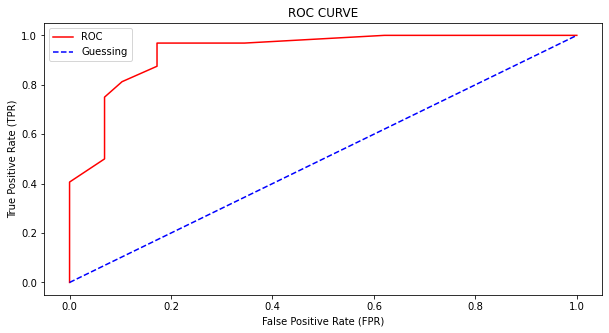

In [63]:
#plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    #plot roc curve
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, color='red',label='ROC')
    
    #plot baseline (line with no predictive power)
    plt.plot([0,1],[0,1], color='blue',linestyle='--', label='Guessing')
    
    #customize
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9342672413793104

### 3. Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 6, 26]], dtype=int64)

In [115]:
pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,26,3
1,6,26


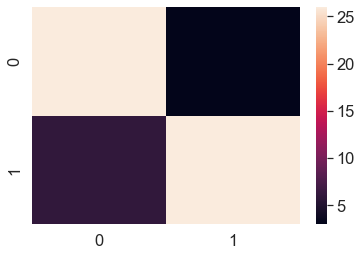

In [92]:
import seaborn as sns

sns.set(font_scale=1.5)

con_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(con_mat);

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

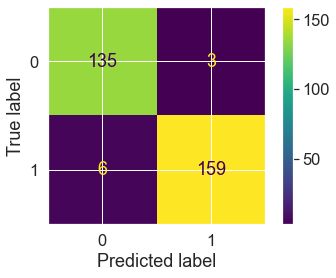

In [103]:
ConfusionMatrixDisplay.from_estimator(clf, x, y); # whole dataset

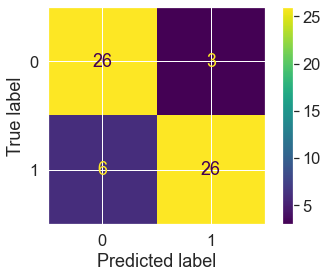

In [110]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);  # only test data

## 4. Classification Report

In [2]:
import pandas as pd
df = pd.read_csv('data/heart-disease.csv')
x = df.drop('target',axis=1)
y = df.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [3]:
from sklearn.metrics import classification_report

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [9]:
# where precision and recall become important
import numpy as np
disease_true = np.zeros(1000)
disease_true[0] = 1        #only one positive case

disease_pred = np.zeros(1000)

pd.DataFrame(classification_report(disease_true, disease_pred, output_dict=True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000
